In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
X=df.drop(columns=['math score'], axis=1)
y=df['math score']

In [ ]:
num_features= X.select_dtypes(exclude='object').columns
cat_features= X.select_dtypes(include='object').columns

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [20]:
X=preprocessor.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=1)

In [32]:
def evaluate_model(true, predicted):
  mae=mean_absolute_error(true, predicted)
  mse=mean_squared_error(true, predicted)
  rmse=np.sqrt(mse)
  score=r2_score(true, predicted)
  return mae,rmse, score

In [30]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}

In [35]:
model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train, y_train)

  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train, y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print("Model performance for Training set")
  print("- Root Mean Squared Error: {:4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:4f}".format(model_train_mae))
  print("- R2 Score: {:4f}".format(model_train_r2))

  print("----------------------------------")

  print("Model performance for Test set")
  print("- Root Mean Squared Error: {:4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:4f}".format(model_test_mae))
  print("- R2 Score: {:4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.399828
- Mean Absolute Error: 4.320002
- R2 Score: 0.870622
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.064845
- Mean Absolute Error: 3.989815
- R2 Score: 0.895481


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.624451
- Mean Absolute Error: 5.241810
- R2 Score: 0.805285
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.464979
- Mean Absolute Error: 5.093529
- R2 Score: 0.829706


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.400054
- Mean Absolute Error: 4.319456
- R2 Score: 0.870611
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.065656
- Mean Absolute Error: 3.987611
- R2 Score: 0.895447


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.909717
- Mean Absolute Error: 4.702250
- 

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'r2 Score']).sort_values(by=["r2 Score"], ascending=False)

,Model Name,r2 Score
0,Linear Regression,0.895481
2,Ridge,0.895447
6,CatBoosting Regressor,0.876273
5,Random Forest Regressor,0.854608
7,AdaBoost Regressor,0.845415
4,XGBRegressor,0.836210
1,Lasso,0.829706
3,K-Neighbors Regressor,0.806595


In [39]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print("Accuracy of the Model is %.2f" %score)

Accuracy of the Model is 89.55


Text(0, 0.5, 'Predicted')

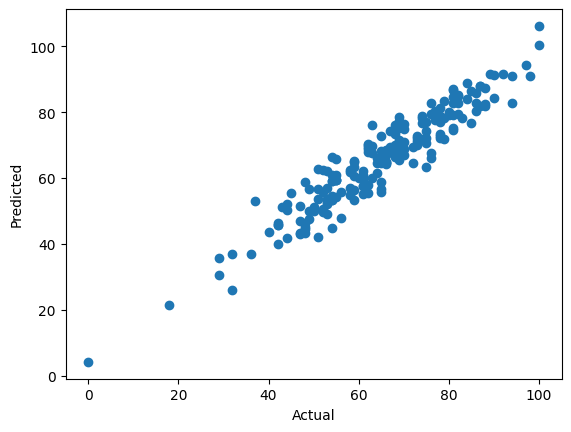

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

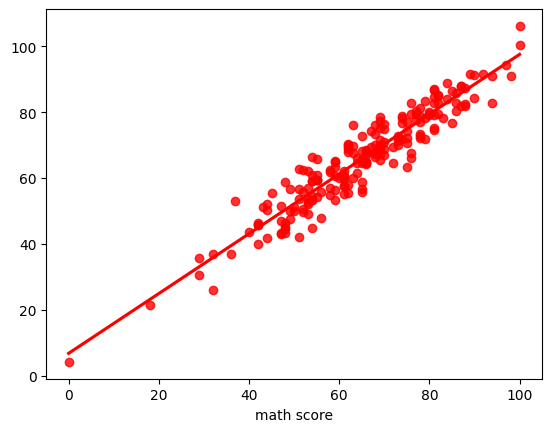

In [47]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [48]:
pred_diff=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_diff

,Actual Value,Predicted Value,Difference
507,55,59.472217,-4.472217
818,60,60.046971,-0.046971
452,65,64.678172,0.321828
368,44,50.288076,-6.288076
242,56,47.891434,8.108566
...,...,...,...
430,64,64.542349,-0.542349
874,43,51.179110,-8.179110
550,79,71.772673,7.227327
608,61,60.946937,0.053063
